In [18]:
import pandas as pd

data = pd.read_csv('full_data_for_models.csv')
data.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [19]:
data.drop(columns=['Crash Date/Time'], inplace=True)
data.head()

,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,35,1,1,3,0,1,0,0,14.88,2,0,7
1,35,1,1,3,0,1,0,0,14.88,2,0,22
2,40,1,1,3,1,1,0,0,1.64,2,0,8
3,40,1,1,3,1,1,0,0,1.64,2,0,5
4,40,1,1,3,1,1,0,0,10.48,2,2,13


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Speed Limit      172105 non-null  int64  
 1   Crash Quarter    172105 non-null  int64  
 2   Crash Month      172105 non-null  int64  
 3   Crash DayOfWeek  172105 non-null  int64  
 4   Crash Hour       172105 non-null  int64  
 5   Is Holiday       172105 non-null  int64  
 6   Is Peak Hour     172105 non-null  int64  
 7   Is Weekend       172105 non-null  int64  
 8   Distance         172105 non-null  float64
 9   Total Vehicles   172105 non-null  int64  
 10  Injury_Target    172105 non-null  int64  
 11  Vehicle Age      172105 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 15.8 MB


# Split the Data

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('Injury_Target', axis=1)
y = data['Injury_Target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the Continuous Values

In [22]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['Speed Limit', 'Distance', 'Vehicle Age', 'Total Vehicles', 'Crash Quarter', 'Crash Month', 'Crash DayOfWeek', 'Crash Hour']

scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

In [23]:
X.head()

,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Vehicle Age
0,0.221542,-1.399766,-1.6506,0.091893,-2.535034,1,0,0,0.511152,-0.014673,-0.163036
1,0.221542,-1.399766,-1.6506,0.091893,-2.535034,1,0,0,0.511152,-0.014673,2.402364
2,0.673624,-1.399766,-1.6506,0.091893,-2.345093,1,0,0,-1.752351,-0.014673,0.007991
3,0.673624,-1.399766,-1.6506,0.091893,-2.345093,1,0,0,-1.752351,-0.014673,-0.505089
4,0.673624,-1.399766,-1.6506,0.091893,-2.345093,1,0,0,-0.241070,-0.014673,0.863124


# Dealing with Class Imbalance of the Training Set Only

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

desired_samples = 30000

smote = SMOTE(sampling_strategy={1: desired_samples, 2: desired_samples, 3: desired_samples, 4: desired_samples})
under_sampler = RandomUnderSampler(sampling_strategy={0: desired_samples})

pipeline = Pipeline(steps=[
    ('over', smote),
    ('under', under_sampler)
])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Print the class distribution of the resampled training set
print("Training set class distribution:")
print(Counter(y_train_resampled))

# Print the class distribution of the test set
print("Test set class distribution:")
print(Counter(y_test))

Training set class distribution:
Counter({0: 30000, 1: 30000, 2: 30000, 3: 30000, 4: 30000})
Test set class distribution:
Counter({0: 28214, 1: 3553, 2: 2364, 3: 254, 4: 36})


# Train and Test the Naive Bayes Model

In [25]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

# Evaluate the model

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.16887946311844512
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.18      0.30     28214
           1       0.12      0.14      0.13      3553
           2       0.07      0.02      0.03      2364
           3       0.01      0.24      0.02       254
           4       0.00      0.58      0.00        36

    accuracy                           0.17     34421
   macro avg       0.21      0.23      0.10     34421
weighted avg       0.73      0.17      0.26     34421



In [27]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 5207  3198   453  5966 13390]
 [  443   483    66   833  1728]
 [  290   269    40   558  1207]
 [   27    19     3    62   143]
 [    6     4     0     5    21]]


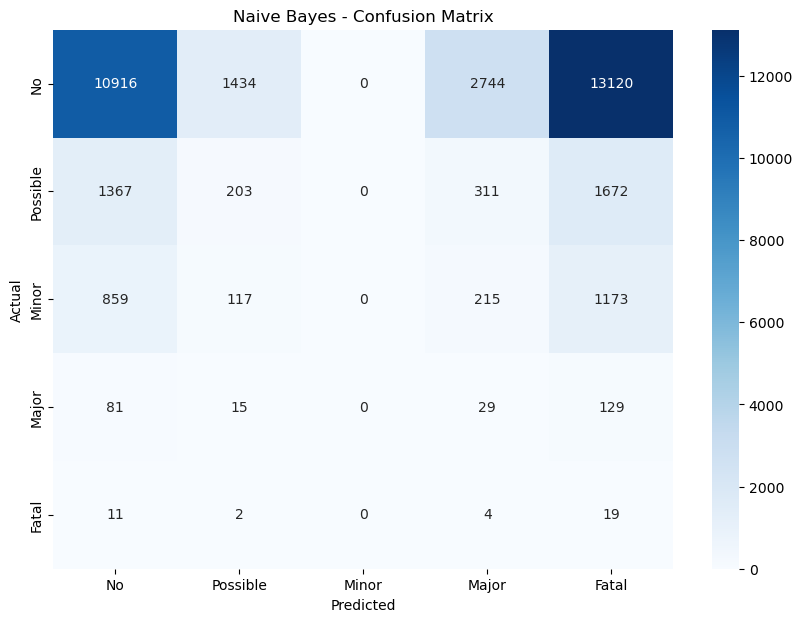

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'], yticklabels=['No', 'Possible', 'Minor', 'Major', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

ROC AUC Score (One-vs-Rest): 0.53
ROC AUC Score (One-vs-One): 0.53


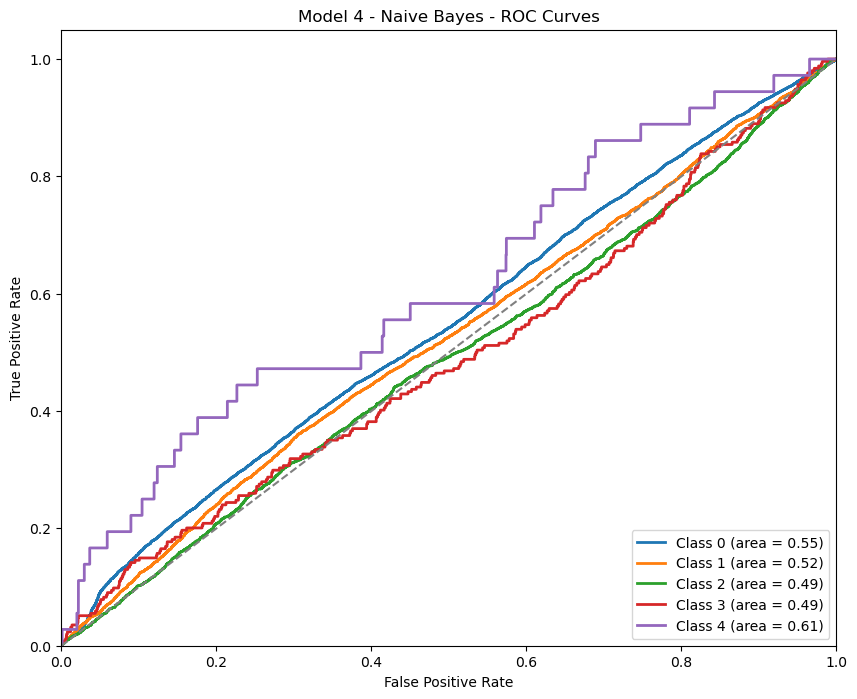

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

y_prob = model.predict_proba(X_test)

# Calculate the ROC AUC score with multi_class parameter
roc_auc_ovr = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr')
roc_auc_ovo = roc_auc_score(y_test_binarized, y_prob, multi_class='ovo')
print(f'ROC AUC Score (One-vs-Rest): {roc_auc_ovr:.2f}')
print(f'ROC AUC Score (One-vs-One): {roc_auc_ovo:.2f}')

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 4 - Naive Bayes - ROC Curves')
plt.legend(loc="lower right")
plt.show()